# Multivariate Linear Regression

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

In [2]:
# load libraries
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

## Learning Objectives

After studying this notebook and your lecture notes, you should be able to:
* Fit multivariate models (including polynomials) using linear regression
* Using the 538 blog post as an example, explain why claiming a trend line is "statistically significant" can be misleading or not informative

## Multivariate Regression

### Motivating Example: Predict Bluegills Age

Data source: https://newonlinecourses.science.psu.edu/stat501/node/325/

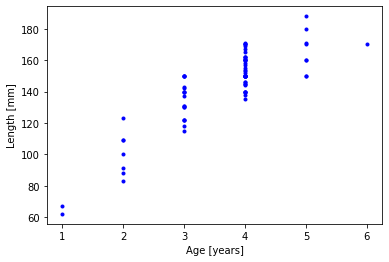

In [3]:
# age of fish in years
age = np.array([1,1,2,2,2,2,3,3,3,3,3,3,3,3,3,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
                4,4,4,4,4,5,4,4,4,5,2,2,4,3,4,3,4,4,4,4,3,3,3,4,4,3,4,5,4,5,4,4,
                3,5,5,4,5,3,4,3,4,6,4,5,4,4])

# length of fish in mm
length = np.array([67,62,109,83,91,88,137,131,122,122,118,115,131,143,142,123,122,
                   138,135,146,146,145,145,144,140,150,152,157,155,153,154,158,162,
                   161,162,165,171,171,162,169,167,188,100,109,150,140,170,150,140,
                   140,150,150,140,150,150,150,160,140,150,170,150,150,150,150,150,
                   150,160,140,160,130,160,130,170,170,160,180,160,170])

plt.plot(age,length,'b.')
plt.xlabel("Age [years]")
plt.ylabel("Length [mm]")
plt.show()

Can we use the age of the fish to predict its length?

### Normal Equations

Recall from Class 20 the formulation for **multivariate linear regression**:

$$
\underbrace{\vec{y}}_{\mathbb{R}^{n x 1}} = \underbrace{\mathbf{X}}_{\mathbb{R}^{n x m}} \cdot \underbrace{\vec{\beta}}_{\mathbb{R}^{m x 1}} + \underbrace{\vec{\epsilon}}_{\mathbb{R}^{n x 1}}
$$

Observations: $\vec{y} = [y_1, y_2, ..., x_n]^T$

Fitted Parameters: $\vec{\beta} = [\beta_0, \beta_1, ..., \beta_{m}]^T$

Data / Feature Matrix:

$$
\mathbf{X} = \begin{bmatrix} 1 & x_{1,1} & x_{1,2} & \dots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{n,2} & \dots & x_{n,m}
\end{bmatrix}
$$

For example, we could fit a linear model where reactor yield depended on both temperature, pressure and inlet compositions. 

The linear regression best fit estimates can be easily computed with linear algebra:

$$\mathbf{X}^T \mathbf{X} \hat{\beta} = \mathbf{X}^T y$$

or

$$ \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y$$

where the $\vec{~}$ is omitted for simplicity. Above are know as the **normal equations**.

By applying the error propagation formula to the above equation, we can easily calculate the **covariance matrix of the fitted parameters**:

$$\Sigma_{\hat{\beta}} = \hat{\sigma}^2  (\mathbf{X}^T \mathbf{X})^{-1}$$

### Attempt 1. Linear Model

Let's start with a simple regression model:

$$
y = \beta_0 + \beta_1 x_1
$$

where $x_1$ is the length of the fish.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Construct the feature matrix <tt>X</tt>.
</div>

In [4]:
nfish = len(age)

# feature matrix (store in 'X')
### BEGIN SOLUTION
X = np.ones((nfish,2))
X[:,1] = age
### END SOLUTION

print("X =\n",X)

X =
 [[1. 1.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 5.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 5.]
 [1. 2.]
 [1. 2.]
 [1. 4.]
 [1. 3.]
 [1. 4.]
 [1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 4.]
 [1. 5.]
 [1. 4.]
 [1. 4.]
 [1. 3.]
 [1. 5.]
 [1. 5.]
 [1. 4.]
 [1. 5.]
 [1. 3.]
 [1. 4.]
 [1. 3.]
 [1. 4.]
 [1. 6.]
 [1. 4.]
 [1. 5.]
 [1. 4.]
 [1. 4.]]


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Compute $(\mathbf{X}^T \mathbf{X})^{-1}$ and store in <tt>XXinv</tt>.
</div>

In [5]:
# calculate inverse of XT * X
### BEGIN SOLUTION
XXinv = np.linalg.inv(X.transpose() @ X)
### END SOLUTION
print("inv(XT X) =\n",XXinv)

inv(XT X) =
 [[ 0.21161665 -0.05479187]
 [-0.05479187  0.01510165]]


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Compute $\hat{\mathbf{\beta}}$ (fitted coefficients) and store in <tt>beta_hat</tt>.
</div>

In [6]:
# recall we can calculate the best fit coefficients with linear algebra
### BEGIN SOLUTION
beta_hat = XXinv @ X.transpose() @ length
### END SOLUTION
print("beta_hat =",beta_hat)

beta_hat = [62.64898354 22.31229429]


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Complete the code below to evaluate the model and plot the predictions.
</div>

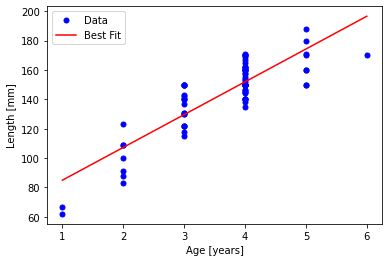

In [7]:
## evaluate predictions

# create ages to evaluate model with
age_plot = np.linspace(1,6,100)

# create new X matrix with 100 rows and 2 columns
Xplot = np.ones((len(age_plot),2))

# fill in second column
### BEGIN SOLUTION
Xplot[:,1] = age_plot
### END SOLUTION

# evaluate model and store in `length_plot`
### BEGIN SOLUTION
length_plot = Xplot @ beta_hat
### END SOLUTION

# plot
plt.plot(age,length,'b.',markersize=10,label="Data")
plt.plot(age_plot,length_plot,'r-',label="Best Fit")
plt.xlabel("Age [years]")
plt.ylabel("Length [mm]")
plt.legend()
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Calculate and plot the residuals.
</div>

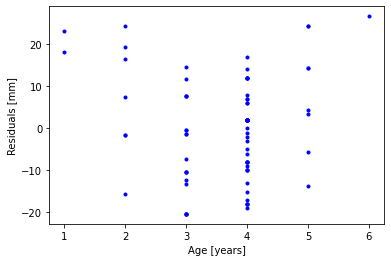

In [8]:
# calculate residuals, store in `e`
### BEGIN SOLUTION
e = X @ beta_hat - length
### END SOLUTION

plt.plot(age,e,'b.')
plt.xlabel("Age [years]")
plt.ylabel("Residuals [mm]")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: Compute the variance of the residuals. Then compute the covariance of the fitted parameters.
</div>

In [9]:
# compute variance of residuals, store in `se`
### BEGIN SOLUTION
se = e @ e / (nfish - 2)
### END SOLUTION
print("variance of residuals = ",se,"add units")

# compute covariance matrix, store in `Sigma_beta`
### BEGIN SOLUTION
Sigma_beta = se**2 * XXinv
### END SOLUTION
print("covariance matrix:\n",Sigma_beta)

variance of residuals =  156.48469455342126 add units
covariance matrix:
 [[ 5181.95418684 -1341.71366411]
 [-1341.71366411   369.80093923]]


### Attempt 2. Quadratic Model

Let's try a quadratic model now:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

where $x_1$ is the age and $x_2$ is age squared.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
    <b>Class Activity</b>: With a partner, modify the code below (copied from previous example) to and fit the quadratic model.
</div>

In [10]:
# construct the feature matrix
X = np.ones((nfish,3))

### BEGIN SOLUTION
X[:,1] = age
X[:,2] = age**2
### END SOLUTION

print("X =\n",X)

X =
 [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  2.  4.]
 [ 1.  2.  4.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  2.  4.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  4. 16.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  5. 25.]
 [ 1.

In [11]:
# calculate inverse of XT * X, store in XXinv
### BEGIN SOLUTION
XXinv = np.linalg.inv(X.transpose().dot(X))
### END SOLUTION
print("inv(XT X) =\n",XXinv)

inv(XT X) =
 [[ 1.02032931 -0.57830612  0.07783618]
 [-0.57830612  0.35399479 -0.05038669]
 [ 0.07783618 -0.05038669  0.0074915 ]]


In [12]:
# recall we can calculate the best fit coefficients with linear algebra, store in beta_hat
### BEGIN SOLUTION
beta_hat = XXinv @ X.transpose() @ length
### END SOLUTION
print("beta_hat =",beta_hat)

beta_hat = [13.62237616 54.04931191 -4.71866479]


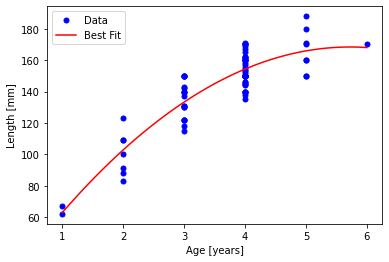

In [13]:
## evaluate predictions

# create ages to evaluate model with
age_plot = np.linspace(1,6,100)

# create new X matrix with 100 rows and 2 columns
Xplot = np.ones((len(age_plot),3))

# fill in second and third column
### BEGIN SOLUTION
Xplot[:,1] = age_plot
Xplot[:,2] = age_plot**2
### END SOLUTION

# evaluate model, store predictions in length_plot
### BEGIN SOLUTION
length_plot = Xplot @ beta_hat
### END SOLUTION

# plot
plt.plot(age,length,'b.',markersize=10,label="Data")
plt.plot(age_plot,length_plot,'r-',label="Best Fit")
plt.xlabel("Age [years]")
plt.ylabel("Length [mm]")
plt.legend()
plt.show()

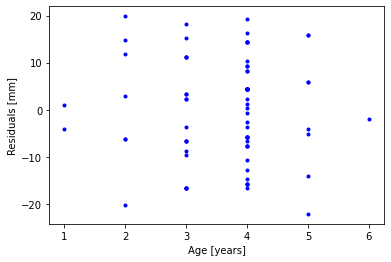

In [14]:
# calculate residuals, store in `e`
### BEGIN SOLUTION
e = X @ beta_hat - length
### END SOLUTION

plt.plot(age,e,'b.')
plt.xlabel("Age [years]")
plt.ylabel("Residuals [mm]")
plt.show()

In [15]:
# compute the variance of residuals, store in `e`
### BEGIN SOLUTION
se = e @ e / (nfish - 3)
### END SOLUTION


# compute covariance matrix, store in `Sigma_beta`
### BEGIN SOLUTION
Sigma_beta = se**2 * XXinv
### END SOLUTION
print("covariance matrix:\n",Sigma_beta)

covariance matrix:
 [[14434.94954579 -8181.49557518  1101.17523061]
 [-8181.49557518  5008.08601591  -712.8377746 ]
 [ 1101.17523061  -712.8377746    105.98483278]]


### How to select the best model?

We can calculate a p-value to determine if a model is statistically significant.

https://fivethirtyeight.com/features/science-isnt-broken/#part1